<center> 
    <h3>CDM Project</h3>
    <h1>"PCA Analysis of Gene Expression Profiles among the CD34 and AML samples"</h1>
    <!-- <br> -->
    <h4></h4>
    <h3>Seyed Mohammad Hossein Hashemi</h3>
    <h5>March 2025</h5>
    <h1></h1>

</center>

# Import requirements

In [1]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import numpy as np
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')

# EDA

In [2]:
df = pd.read_csv("geneExpr.csv")
df.head() #Top 5

,Unnamed: 0,GSM239170,GSM239323,GSM239324,GSM239326,GSM239328,GSM239329,GSM239331,GSM239332,GSM239333,...,GSM240500,GSM240501,GSM240502,GSM240503,GSM240504,GSM240505,GSM240506,GSM240507,GSM240508,GSM240509
0,X1007_s_at,3.016704,3.285669,2.929483,2.92282,3.159503,3.163327,2.985901,3.122709,3.070948,...,3.134267,3.20705,2.971385,2.843774,3.037604,3.048857,3.113882,3.033006,3.212747,3.448303
1,X1053_at,7.977735,6.532514,6.388007,6.46668,6.432795,6.407322,6.426471,6.376394,6.46907,...,6.550238,6.916009,7.15575,6.47164,6.508025,6.631739,6.52861,6.684813,6.556031,6.341901
2,X117_at,4.207281,4.994966,4.401597,4.747115,4.830046,4.213762,4.884418,4.431888,4.849665,...,4.518836,4.193237,4.061884,4.175654,4.115092,5.090686,4.456707,3.923634,4.258683,4.327858
3,X121_at,7.256095,7.420807,6.99934,7.094489,7.024333,7.17929,7.159899,7.009978,6.830979,...,7.550825,7.289547,6.936977,7.136469,7.134417,7.281586,7.109759,7.110187,7.094449,7.096146
4,X1255_g_at,2.204955,2.331625,2.133305,2.183329,2.127783,2.269698,2.264706,2.25394,2.287924,...,2.286511,2.24272,2.199011,2.099221,2.214287,2.198988,2.162079,2.223595,2.256448,2.240602


In [3]:
df.tail() # Last 5

,Unnamed: 0,GSM239170,GSM239323,GSM239324,GSM239326,GSM239328,GSM239329,GSM239331,GSM239332,GSM239333,...,GSM240500,GSM240501,GSM240502,GSM240503,GSM240504,GSM240505,GSM240506,GSM240507,GSM240508,GSM240509
22279,AFFX.ThrX.M_at,2.931302,3.057272,2.819624,2.860894,2.841193,3.021048,3.012698,3.005799,3.099729,...,3.035430,2.976812,2.869163,2.778978,2.901959,2.823428,2.862471,2.949511,3.002177,2.977225
22280,AFFX.TrpnX.3_at,2.921329,3.216571,2.770506,2.870072,2.801787,3.059062,3.052558,3.041824,3.156722,...,3.085854,3.005877,2.904215,2.762760,2.948774,2.872268,2.818250,2.943037,3.037642,2.989376
22281,AFFX.TrpnX.5_at,2.310954,2.408195,2.266408,2.293560,2.259069,2.374368,2.361112,2.358318,2.419446,...,2.382356,2.340968,2.303079,2.236351,2.312311,2.300529,2.270892,2.317999,2.355840,2.331802
22282,AFFX.TrpnX.M_at,2.979276,3.111186,2.856575,2.956890,2.902642,3.085186,3.064024,3.057336,3.115666,...,3.099035,3.044683,2.983068,2.943529,3.035102,2.952355,2.937231,2.999774,3.053515,3.037078
22283,Group,CD34,BM,BM,BM,BM,BM,BM,BM,BM,...,CD34,CD34,CD34,CD34,CD34,CD34,CD34,CD34,CD34,CD34


So the last column indicates the group and also wether they are BM or CD34

In [4]:
# lets fow now fiter this row
df.iloc[:-1,:] 

,Unnamed: 0,GSM239170,GSM239323,GSM239324,GSM239326,GSM239328,GSM239329,GSM239331,GSM239332,GSM239333,...,GSM240500,GSM240501,GSM240502,GSM240503,GSM240504,GSM240505,GSM240506,GSM240507,GSM240508,GSM240509
0,X1007_s_at,3.016704,3.285669,2.929483,2.92282,3.159503,3.163327,2.985901,3.122709,3.070948,...,3.134267,3.20705,2.971385,2.843774,3.037604,3.048857,3.113882,3.033006,3.212747,3.448303
1,X1053_at,7.977735,6.532514,6.388007,6.46668,6.432795,6.407322,6.426471,6.376394,6.46907,...,6.550238,6.916009,7.15575,6.47164,6.508025,6.631739,6.52861,6.684813,6.556031,6.341901
2,X117_at,4.207281,4.994966,4.401597,4.747115,4.830046,4.213762,4.884418,4.431888,4.849665,...,4.518836,4.193237,4.061884,4.175654,4.115092,5.090686,4.456707,3.923634,4.258683,4.327858
3,X121_at,7.256095,7.420807,6.99934,7.094489,7.024333,7.17929,7.159899,7.009978,6.830979,...,7.550825,7.289547,6.936977,7.136469,7.134417,7.281586,7.109759,7.110187,7.094449,7.096146
4,X1255_g_at,2.204955,2.331625,2.133305,2.183329,2.127783,2.269698,2.264706,2.25394,2.287924,...,2.286511,2.24272,2.199011,2.099221,2.214287,2.198988,2.162079,2.223595,2.256448,2.240602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22278,AFFX.ThrX.5_at,3.315925,3.404240,3.193683,3.269302,3.232732,3.367292,3.352239,3.311876,3.388473,...,3.396143,3.320822,3.303040,3.222953,3.305828,3.290917,3.169665,3.309441,3.352443,3.333275
22279,AFFX.ThrX.M_at,2.931302,3.057272,2.819624,2.860894,2.841193,3.021048,3.012698,3.005799,3.099729,...,3.035430,2.976812,2.869163,2.778978,2.901959,2.823428,2.862471,2.949511,3.002177,2.977225
22280,AFFX.TrpnX.3_at,2.921329,3.216571,2.770506,2.870072,2.801787,3.059062,3.052558,3.041824,3.156722,...,3.085854,3.005877,2.904215,2.762760,2.948774,2.872268,2.818250,2.943037,3.037642,2.989376
22281,AFFX.TrpnX.5_at,2.310954,2.408195,2.266408,2.293560,2.259069,2.374368,2.361112,2.358318,2.419446,...,2.382356,2.340968,2.303079,2.236351,2.312311,2.300529,2.270892,2.317999,2.355840,2.331802


In [5]:
# Checking for possible Null values
df.iloc[:-1,:].isnull().sum().sort_values(ascending=False)

Unnamed: 0    0
GSM239494     0
GSM239496     0
GSM239497     0
GSM239498     0
             ..
GSM239488     0
GSM239489     0
GSM239490     0
GSM239491     0
GSM240509     0
Length: 65, dtype: int64

In [6]:
# Getting an insight into the dataset provided (i.g Format)
df.iloc[:-1,:].info()
# turns out all the features have been saved as object (should convert it to float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22283 entries, 0 to 22282
Data columns (total 65 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  22283 non-null  object
 1   GSM239170   22283 non-null  object
 2   GSM239323   22283 non-null  object
 3   GSM239324   22283 non-null  object
 4   GSM239326   22283 non-null  object
 5   GSM239328   22283 non-null  object
 6   GSM239329   22283 non-null  object
 7   GSM239331   22283 non-null  object
 8   GSM239332   22283 non-null  object
 9   GSM239333   22283 non-null  object
 10  GSM239334   22283 non-null  object
 11  GSM239335   22283 non-null  object
 12  GSM239338   22283 non-null  object
 13  GSM239339   22283 non-null  object
 14  GSM239340   22283 non-null  object
 15  GSM239341   22283 non-null  object
 16  GSM239342   22283 non-null  object
 17  GSM239343   22283 non-null  object
 18  GSM239344   22283 non-null  object
 19  GSM239345   22283 non-null  object
 20  GSM239

In [7]:
# A brief describtion of the dataset and its distribution properties (Frequency, Count, Number of Unique_values)
df.iloc[:-1,1:].astype(float).describe()

,GSM239170,GSM239323,GSM239324,GSM239326,GSM239328,GSM239329,GSM239331,GSM239332,GSM239333,GSM239334,...,GSM240500,GSM240501,GSM240502,GSM240503,GSM240504,GSM240505,GSM240506,GSM240507,GSM240508,GSM240509
count,22283.000000,22283.000000,22283.000000,22283.000000,22283.000000,22283.000000,22283.000000,22283.000000,22283.000000,22283.000000,...,22283.000000,22283.000000,22283.000000,22283.000000,22283.000000,22283.000000,22283.000000,22283.000000,22283.000000,22283.000000
mean,5.101781,5.128212,5.098362,5.115979,5.107144,5.118836,5.125514,5.144306,5.128983,5.129584,...,5.128629,5.112833,5.121852,5.100788,5.112015,5.127957,5.106112,5.094405,5.135535,5.091006
std,2.679465,2.564215,2.677917,2.661520,2.679593,2.591267,2.608357,2.621734,2.564095,2.647812,...,2.596603,2.621806,2.684626,2.701796,2.644114,2.689992,2.684269,2.630283,2.630244,2.597418
min,0.821865,0.845824,0.809876,0.807311,0.795792,0.830150,0.828799,0.828893,0.846076,0.821059,...,0.843460,0.828381,0.815294,0.787267,0.820728,0.808727,0.804076,0.822079,0.941346,0.829170
25%,2.806120,2.966380,2.756015,2.792465,2.754007,2.898140,2.884569,2.884206,2.938047,2.835757,...,2.913118,2.855764,2.799974,2.723434,2.820806,2.775399,2.762845,2.831074,2.875029,2.860042
50%,4.339650,4.502924,4.440466,4.473479,4.461331,4.465603,4.471255,4.480986,4.506111,4.461006,...,4.464073,4.412060,4.402455,4.406447,4.419097,4.409201,4.384261,4.389469,4.433866,4.412892
75%,7.044225,6.889607,7.045859,7.049741,7.096740,6.972891,7.015071,7.054403,6.944852,7.061619,...,6.994209,7.049437,7.118118,7.139069,7.067360,7.167732,7.122250,7.022313,7.069204,6.978832
max,14.850120,15.080811,15.298730,15.031368,14.902903,15.732611,15.161288,15.265532,15.220055,15.095264,...,14.940150,14.794230,14.840570,15.006070,14.961750,14.854660,14.821350,14.955900,14.937900,14.837420


In [8]:
df.iloc[-1:,1:].values.flatten()

array(['CD34', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM',
       'CD34', 'CD34', 'CD34', 'CD34', 'CD34', 'CD34', 'CD34', 'AML',
       'AML', 'AML', 'AML', 'AML', 'AML', 'AML', 'AML', 'AML', 'AML',
       'AML', 'AML', 'AML', 'AML', 'AML', 'AML', 'AML', 'AML', 'AML',
       'AML', 'AML', 'AML', 'AML', 'AML', 'AML', 'AML', 'P8', 'P8', 'P8',
       'P8', 'P8', 'P8', 'P8', 'P8', 'P8', 'P8', 'CD34', 'CD34', 'CD34',
       'CD34', 'CD34', 'CD34', 'CD34', 'CD34', 'CD34', 'CD34'],
      dtype=object)

In [9]:
# First we should know what are the unique values of "Group"
pd.unique(df.iloc[-1:,1:].values.flatten())

array(['CD34', 'BM', 'AML', 'P8'], dtype=object)

In [10]:
# now we want to count the number of genes that belong either to CD34 or BM and etc
cd34_counter, bm_counter, aml_counter, p8_counter = 0,0,0,0
for index in df.columns[1:]:
    if df[index].tail(1).values == 'CD34':
        cd34_counter +=1
    elif df[index].tail(1).values == 'BM':
        bm_counter +=1
    elif df[index].tail(1).values == 'AML':
        aml_counter +=1
    elif df[index].tail(1).values == 'P8':
        p8_counter +=1

print(f"CD34  Count: {cd34_counter},  Freq: %{100*cd34_counter//len(df.columns[1:])}")
print(f"BM    Count: {bm_counter},  Freq: %{100*bm_counter//len(df.columns[1:])}")
print(f"AML   Count: {aml_counter},  Freq: %{100*aml_counter//len(df.columns[1:])}")
print(f"P8    Count: {p8_counter},  Freq: %{100*p8_counter//len(df.columns[1:])}")


CD34  Count: 18,  Freq: %28
BM    Count: 10,  Freq: %15
AML   Count: 26,  Freq: %40
P8    Count: 10,  Freq: %15


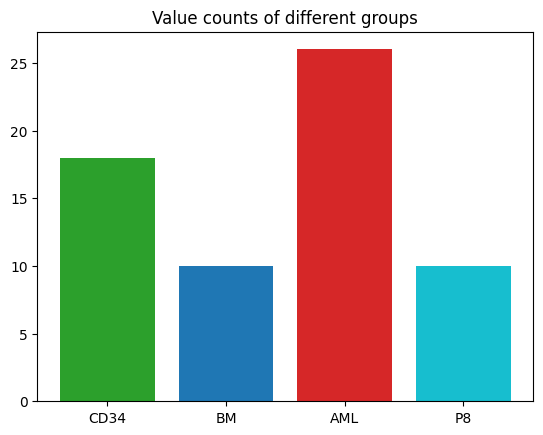

In [11]:
fig, ax = plt.subplots()

counts = [cd34_counter, bm_counter, aml_counter, p8_counter]
bar_labels = ['CD34', 'BM', 'AML', 'P8']
bar_colors = ['tab:green', 'tab:blue', 'tab:red', 'tab:cyan']

ax.bar(bar_labels, counts, color=bar_colors)
ax.set_title('Value counts of different groups')
plt.show()

- we have 18 samples belonging to CD34
- we have 10 samples belonging to BM
- we have 26 samples belonging to AML
- we have 10 samples belonging to P8

In [12]:
df.rename(columns={'Unnamed: 0': 'PID (Genes)'}, inplace=True)
df.head(3)

,PID (Genes),GSM239170,GSM239323,GSM239324,GSM239326,GSM239328,GSM239329,GSM239331,GSM239332,GSM239333,...,GSM240500,GSM240501,GSM240502,GSM240503,GSM240504,GSM240505,GSM240506,GSM240507,GSM240508,GSM240509
0,X1007_s_at,3.016704,3.285669,2.929483,2.92282,3.159503,3.163327,2.985901,3.122709,3.070948,...,3.134267,3.20705,2.971385,2.843774,3.037604,3.048857,3.113882,3.033006,3.212747,3.448303
1,X1053_at,7.977735,6.532514,6.388007,6.46668,6.432795,6.407322,6.426471,6.376394,6.46907,...,6.550238,6.916009,7.15575,6.47164,6.508025,6.631739,6.52861,6.684813,6.556031,6.341901
2,X117_at,4.207281,4.994966,4.401597,4.747115,4.830046,4.213762,4.884418,4.431888,4.849665,...,4.518836,4.193237,4.061884,4.175654,4.115092,5.090686,4.456707,3.923634,4.258683,4.327858


In [13]:
# for simplicity in working with df we transpose it for now ...
df_t = df.transpose()
df_t.head()

,0,1,2,3,4,5,6,7,8,9,...,22274,22275,22276,22277,22278,22279,22280,22281,22282,22283
PID (Genes),X1007_s_at,X1053_at,X117_at,X121_at,X1255_g_at,X1294_at,X1316_at,X1320_at,X1405_i_at,X1431_at,...,AFFX.r2.Hs28SrRNA.M_at,AFFX.r2.P1.cre.3_at,AFFX.r2.P1.cre.5_at,AFFX.ThrX.3_at,AFFX.ThrX.5_at,AFFX.ThrX.M_at,AFFX.TrpnX.3_at,AFFX.TrpnX.5_at,AFFX.TrpnX.M_at,Group
GSM239170,3.016704,7.977735,4.207281,7.256095,2.204955,7.284373,4.265793,2.694352,3.646303,3.040292,...,5.662607,14.22883,13.71368,2.308299,3.315925,2.931302,2.921329,2.310954,2.979276,CD34
GSM239323,3.285669,6.532514,4.994966,7.420807,2.331625,6.983594,4.970684,2.916325,8.817892,3.384867,...,6.186479,15.04242,14.48678,2.388966,3.404240,3.057272,3.216571,2.408195,3.111186,BM
GSM239324,2.929483,6.388007,4.401597,6.99934,2.133305,6.863371,4.595545,2.57813,11.424879,2.958851,...,5.821644,13.98402,13.28735,2.273666,3.193683,2.819624,2.770506,2.266408,2.856575,BM
GSM239326,2.92282,6.46668,4.747115,7.094489,2.183329,6.865971,4.575545,2.659718,10.747381,3.047881,...,6.145527,14.12824,13.76009,2.280654,3.269302,2.860894,2.870072,2.293560,2.956890,BM


In [14]:
df_t.columns = df_t.iloc[0]
df_t = df_t[1:] # Drop the first row, as it's now used as the column names
# df_t = df_t.reset_index(drop=False)
df_t.head()

PID (Genes),X1007_s_at,X1053_at,X117_at,X121_at,X1255_g_at,X1294_at,X1316_at,X1320_at,X1405_i_at,X1431_at,...,AFFX.r2.Hs28SrRNA.M_at,AFFX.r2.P1.cre.3_at,AFFX.r2.P1.cre.5_at,AFFX.ThrX.3_at,AFFX.ThrX.5_at,AFFX.ThrX.M_at,AFFX.TrpnX.3_at,AFFX.TrpnX.5_at,AFFX.TrpnX.M_at,Group
GSM239170,3.016704,7.977735,4.207281,7.256095,2.204955,7.284373,4.265793,2.694352,3.646303,3.040292,...,5.662607,14.22883,13.71368,2.308299,3.315925,2.931302,2.921329,2.310954,2.979276,CD34
GSM239323,3.285669,6.532514,4.994966,7.420807,2.331625,6.983594,4.970684,2.916325,8.817892,3.384867,...,6.186479,15.04242,14.48678,2.388966,3.404240,3.057272,3.216571,2.408195,3.111186,BM
GSM239324,2.929483,6.388007,4.401597,6.99934,2.133305,6.863371,4.595545,2.57813,11.424879,2.958851,...,5.821644,13.98402,13.28735,2.273666,3.193683,2.819624,2.770506,2.266408,2.856575,BM
GSM239326,2.92282,6.46668,4.747115,7.094489,2.183329,6.865971,4.575545,2.659718,10.747381,3.047881,...,6.145527,14.12824,13.76009,2.280654,3.269302,2.860894,2.870072,2.293560,2.956890,BM
GSM239328,3.159503,6.432795,4.830046,7.024333,2.127783,7.219841,4.547958,2.567437,9.296043,2.878563,...,6.359857,14.18243,13.60005,2.238840,3.232732,2.841193,2.801787,2.259069,2.902642,BM


Now lets filterout the samples belonging to "AML" and "CD34"

In [15]:
# df_t[df_t["Group"] == "CD34" | df_t[df_t["Group"] == "AML"]]
df.tail()

,PID (Genes),GSM239170,GSM239323,GSM239324,GSM239326,GSM239328,GSM239329,GSM239331,GSM239332,GSM239333,...,GSM240500,GSM240501,GSM240502,GSM240503,GSM240504,GSM240505,GSM240506,GSM240507,GSM240508,GSM240509
22279,AFFX.ThrX.M_at,2.931302,3.057272,2.819624,2.860894,2.841193,3.021048,3.012698,3.005799,3.099729,...,3.035430,2.976812,2.869163,2.778978,2.901959,2.823428,2.862471,2.949511,3.002177,2.977225
22280,AFFX.TrpnX.3_at,2.921329,3.216571,2.770506,2.870072,2.801787,3.059062,3.052558,3.041824,3.156722,...,3.085854,3.005877,2.904215,2.762760,2.948774,2.872268,2.818250,2.943037,3.037642,2.989376
22281,AFFX.TrpnX.5_at,2.310954,2.408195,2.266408,2.293560,2.259069,2.374368,2.361112,2.358318,2.419446,...,2.382356,2.340968,2.303079,2.236351,2.312311,2.300529,2.270892,2.317999,2.355840,2.331802
22282,AFFX.TrpnX.M_at,2.979276,3.111186,2.856575,2.956890,2.902642,3.085186,3.064024,3.057336,3.115666,...,3.099035,3.044683,2.983068,2.943529,3.035102,2.952355,2.937231,2.999774,3.053515,3.037078
22283,Group,CD34,BM,BM,BM,BM,BM,BM,BM,BM,...,CD34,CD34,CD34,CD34,CD34,CD34,CD34,CD34,CD34,CD34


# Data preprocessing

In [16]:
df_t_filtered = df_t[(df_t["Group"] == "CD34") | (df_t["Group"] == "AML")] # query to only keep the "CD34" and "AML" groups

In [17]:
df_t_filtered['Group'] = df_t_filtered['Group'].map({'CD34': 0, 'AML': 1}) # Now we need to Encode the Groups values (AML: 1, CD34: 0)

In [18]:
# Here is how the data looks like right now
df_t_filtered.head()

PID (Genes),X1007_s_at,X1053_at,X117_at,X121_at,X1255_g_at,X1294_at,X1316_at,X1320_at,X1405_i_at,X1431_at,...,AFFX.r2.Hs28SrRNA.M_at,AFFX.r2.P1.cre.3_at,AFFX.r2.P1.cre.5_at,AFFX.ThrX.3_at,AFFX.ThrX.5_at,AFFX.ThrX.M_at,AFFX.TrpnX.3_at,AFFX.TrpnX.5_at,AFFX.TrpnX.M_at,Group
GSM239170,3.016704,7.977735,4.207281,7.256095,2.204955,7.284373,4.265793,2.694352,3.646303,3.040292,...,5.662607,14.22883,13.71368,2.308299,3.315925,2.931302,2.921329,2.310954,2.979276,0
GSM239338,3.434466,7.222011,8.79347,7.307329,2.31109,7.41685,4.715803,2.926395,4.167416,3.294428,...,5.563256,13.91975,13.32317,2.406685,3.411422,3.096711,3.144971,2.428894,3.094885,0
GSM239339,3.097022,7.546395,11.567416,7.29586,2.246389,7.682724,4.568233,2.775295,3.99101,3.104099,...,4.442192,14.08741,13.43035,2.348827,3.342484,2.955126,3.000110,2.342634,3.040180,0
GSM239340,3.086459,7.218213,12.358038,7.457465,2.286264,7.79936,4.698334,2.833505,3.887295,3.209292,...,5.677135,14.39588,13.91575,2.359997,3.436739,3.015702,3.082044,2.372824,3.082721,0
GSM239341,3.160318,7.669253,4.351149,7.634629,2.223855,7.99853,4.618474,2.926455,4.662554,3.085328,...,5.668914,14.42794,13.75347,2.323607,3.316649,2.920548,2.975988,2.318059,3.013136,0


In [19]:
new_df = df_t_filtered.drop(["Group"], axis=1).astype(float) # lets drop the group column for now and covert all of them into float
new_df.describe()

PID (Genes),X1007_s_at,X1053_at,X117_at,X121_at,X1255_g_at,X1294_at,X1316_at,X1320_at,X1405_i_at,X1431_at,...,AFFX.r2.Hs28SrRNA.5_at,AFFX.r2.Hs28SrRNA.M_at,AFFX.r2.P1.cre.3_at,AFFX.r2.P1.cre.5_at,AFFX.ThrX.3_at,AFFX.ThrX.5_at,AFFX.ThrX.M_at,AFFX.TrpnX.3_at,AFFX.TrpnX.5_at,AFFX.TrpnX.M_at
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,3.167022,6.725487,5.611964,7.398798,2.256324,7.919113,4.686025,2.803709,5.961967,3.196512,...,6.143097,5.567517,14.441220,13.802739,2.355594,3.363938,2.997787,3.035030,2.362448,3.058517
std,0.244331,0.557595,2.170772,0.321031,0.078325,0.593446,0.278939,0.138600,1.891176,0.214846,...,0.400635,0.534448,0.366129,0.370475,0.073131,0.100322,0.141452,0.157639,0.087238,0.112204
min,2.738629,5.707238,3.923634,6.665644,2.068680,6.706907,4.183888,2.482681,3.125076,2.828577,...,5.114908,3.857543,13.790590,13.248150,2.146048,3.164349,2.596729,2.650682,2.144036,2.855614
25%,3.008463,6.392643,4.203770,7.135956,2.221265,7.564968,4.528736,2.720129,4.214320,3.061721,...,5.983409,5.376448,14.205130,13.588928,2.317962,3.308960,2.920199,2.938803,2.310345,2.987027
50%,3.117012,6.553135,4.572465,7.404220,2.245503,7.905448,4.650691,2.777492,5.763005,3.169503,...,6.112042,5.672035,14.364775,13.728170,2.349985,3.341199,2.983412,3.025152,2.344894,3.046308
75%,3.253152,7.045318,5.978246,7.609514,2.295507,8.313325,4.799417,2.895800,7.479179,3.299287,...,6.291113,5.840786,14.670400,13.977593,2.398454,3.418346,3.098122,3.132161,2.432529,3.103642
max,4.189943,8.143075,12.358038,8.221074,2.512393,9.531410,5.479123,3.174003,10.370916,4.040014,...,7.174106,6.401937,15.616970,14.881330,2.535120,3.716532,3.306872,3.404124,2.561197,3.351843


# PCA implementaiotn using SVD

This is how the data looks now

In [20]:
new_df

PID (Genes),X1007_s_at,X1053_at,X117_at,X121_at,X1255_g_at,X1294_at,X1316_at,X1320_at,X1405_i_at,X1431_at,...,AFFX.r2.Hs28SrRNA.5_at,AFFX.r2.Hs28SrRNA.M_at,AFFX.r2.P1.cre.3_at,AFFX.r2.P1.cre.5_at,AFFX.ThrX.3_at,AFFX.ThrX.5_at,AFFX.ThrX.M_at,AFFX.TrpnX.3_at,AFFX.TrpnX.5_at,AFFX.TrpnX.M_at
GSM239170,3.016704,7.977735,4.207281,7.256095,2.204955,7.284373,4.265793,2.694352,3.646303,3.040292,...,6.285019,5.662607,14.22883,13.71368,2.308299,3.315925,2.931302,2.921329,2.310954,2.979276
GSM239338,3.434466,7.222011,8.793470,7.307329,2.311090,7.416850,4.715803,2.926395,4.167416,3.294428,...,5.851245,5.563256,13.91975,13.32317,2.406685,3.411422,3.096711,3.144971,2.428894,3.094885
GSM239339,3.097022,7.546395,11.567416,7.295860,2.246389,7.682724,4.568233,2.775295,3.991010,3.104099,...,5.114908,4.442192,14.08741,13.43035,2.348827,3.342484,2.955126,3.000110,2.342634,3.040180
GSM239340,3.086459,7.218213,12.358038,7.457465,2.286264,7.799360,4.698334,2.833505,3.887295,3.209292,...,6.054256,5.677135,14.39588,13.91575,2.359997,3.436739,3.015702,3.082044,2.372824,3.082721
GSM239341,3.160318,7.669253,4.351149,7.634629,2.223855,7.998530,4.618474,2.926455,4.662554,3.085328,...,6.574449,5.668914,14.42794,13.75347,2.323607,3.316649,2.920548,2.975988,2.318059,3.013136
GSM239342,3.095904,7.325655,5.914960,7.615398,2.244618,7.725382,4.657844,2.765049,3.650970,3.153391,...,5.529972,4.591465,14.76110,14.23332,2.339409,3.338575,2.977801,3.020336,2.345774,3.037584
GSM239343,3.446041,7.538480,6.574822,8.019825,2.512393,6.706907,5.099307,3.055589,4.048667,3.513844,...,6.095742,6.272971,14.67418,14.07245,2.497693,3.524313,3.288722,3.338048,2.561197,3.229362
GSM239344,2.999562,8.143075,10.884015,7.527252,2.223591,7.569305,4.595798,2.749515,4.229955,3.067158,...,5.800788,5.151081,14.20181,13.44355,2.307626,3.317273,2.869996,2.926101,2.300665,2.988347
GSM239345,3.241151,5.843752,4.138507,7.477436,2.253757,6.878233,4.697850,2.787326,5.175507,3.194372,...,6.621147,5.682504,14.84430,14.20724,2.351144,3.353980,3.006341,3.035856,2.344014,3.051648
GSM239346,4.189943,6.520338,6.168105,7.535749,2.201563,7.674246,4.541021,2.666946,5.485495,2.987243,...,5.997013,5.969957,14.32063,13.67561,2.285146,3.203653,2.888945,2.905374,2.294500,2.954486


In [21]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components # number of PC we want to reduce
        self.features = None # The dataframe will be fed into this variable
        self.scores = None # indicating the PC scores
        self.components = None # Gene Loadings
        self.explained_var = None # Var per PC
        self.explained_var_ratio = None # Explained Var
        self.transformed_mat = None # Output of Preprocessing
        
        

    # def standardization(self, features):
    #     # features is the dataframe we feed into the class
    #     self.features = features  
    #     df_copy = features.copy()  
        
    #     # Loop through all the columns
    #     for col in tqdm(range(df_copy.shape[1])):  
    #         col_mean = df_copy.iloc[:, col].mean()  # Mean of column
    #         col_std = df_copy.iloc[:, col].std()    # Std of column
    #         # and for each column loop through all the rows
    #         for row in tqdm(range(df_copy.shape[0])):  
    #             og_value = df_copy.iloc[row, col]  
    #             df_copy.iloc[row, col] = (og_value - col_mean) / col_std

    #     # Convert to NumPy after standardization
    #     self.transformed_mat = df_copy.values.astype(float)
    #     return self.transformed_mat

    # ------------------------------------------------------------------------
    # NOTE:
    # Made it more effiecient by using NumPy operations instead of Pandas df commands,
    # kept it as a commented section to remmermber the progresss 
    
    
    def standardization(self, features):  
        """Simple function that iterates over all the indices of the input matrix
            and conducts an standardization operation by reducing mean and then dividing 
            standard deviation from indices"""
        
        # features is the dataframe we feed into the class
        self.features = features.copy()  
        transformed_mat = features.values.astype(float)  
        
        # Loop through all the columns
        for col in tqdm(range(transformed_mat.shape[1])):  
            col_mean = transformed_mat[:, col].mean()  # Mean of column
            col_std = transformed_mat[:, col].std()    # Std of column
            # and for each column loop through all the rows
            for row in range(transformed_mat.shape[0]):  # Removed the second tqdm to only have single progress bar
                transformed_mat[row, col] = (transformed_mat[row, col] - col_mean) / col_std

        self.transformed_mat = transformed_mat  
        return self.transformed_mat


    
    def svd_computation(self, transformed_mat):
        """Conducts Singular Value Decomposition on a given standardized matrix"""
        sample_space, singular_values, rs_vector = np.linalg.svd(transformed_mat, full_matrices=False)
        # Store results as instance variables 
        self.U = sample_space
        self.S = singular_values
        self.Vt = rs_vector
        
        return sample_space, singular_values, rs_vector


    
    def calculate_pcs(self, sample_space, singular_values, rs_vector): 
        """Calcualtes the Principal Components from
            decomposed components (U, S, Vts) calculated by SVD"""
        # Compute scores for n_components
        self.scores = sample_space[:, :self.n_components] * singular_values[:self.n_components]
        # Carefull to limmit the operation to n_components
        self.components = rs_vector[:self.n_components, :]  
        
        return self.scores, self.components


    def explained_var_calculation(self, singular_values):
        """Calculates the explained Variance and its ratio
            from singular values of the decomposed matrix"""
        # multiplt the eigne values to themselves to get explained variance
        self.explained_var = singular_values**2 
        # sum all the explained variances and then Normalize them (division by the total)
        total_variance = np.sum(self.explained_var) 
        self.explained_var_ratio = (self.explained_var / total_variance) * 100

        return self.explained_var, self.explained_var_ratio




In [22]:
# First we should instantiate the PCA class
pca_module = PCA(n_components=2)

In [23]:
# Then we should move on and scale the values of the input matrix (dataframe)
X = pca_module.standardization(new_df)

100%|█████████████████████████████████████████████████████████████████████████| 22283/22283 [00:00<00:00, 27450.73it/s]


In [24]:
# Lets get the eigne values and decompose it
U, S, V_t = pca_module.svd_computation(X)

In [25]:
# Next step should be the calculation of PC scores and components
scores, components = pca_module.calculate_pcs(U, S, V_t)

In [26]:
# Finally we need to calculate the Explained Variance of PC's
explained_var, explained_var_ratio = pca_module.explained_var_calculation(S)

In [27]:
explained_var_ratio

array([2.76660002e+01, 9.66963906e+00, 7.35359815e+00, 5.52518627e+00,
       3.96748722e+00, 3.22873528e+00, 2.78275355e+00, 2.52955003e+00,
       2.38007188e+00, 2.22650731e+00, 2.02676791e+00, 1.86445083e+00,
       1.70148540e+00, 1.66715813e+00, 1.59063456e+00, 1.50594495e+00,
       1.47979260e+00, 1.34599407e+00, 1.29807418e+00, 1.22446686e+00,
       1.15851438e+00, 1.12104953e+00, 1.07711764e+00, 1.03591289e+00,
       9.72406169e-01, 9.46377173e-01, 9.09015985e-01, 8.56434900e-01,
       8.13410652e-01, 7.64474329e-01, 7.55427064e-01, 7.26831407e-01,
       7.14761294e-01, 6.60177181e-01, 6.28090425e-01, 5.91245141e-01,
       5.43310161e-01, 5.23907296e-01, 5.15393400e-01, 4.82189036e-01,
       4.17554761e-01, 3.90438768e-01, 3.61662008e-01, 5.43701368e-28])

In [28]:
print(f"PC1 Explained Ratio: {pca_module.explained_var_ratio[0]:.2f}%")
print(f"PC2 Explained Ratio:: {pca_module.explained_var_ratio[1]:.2f}%")

PC1 Explained Ratio: 27.67%
PC2 Explained Ratio:: 9.67%


# Visualize the dataset along the 1st and 2nd PC

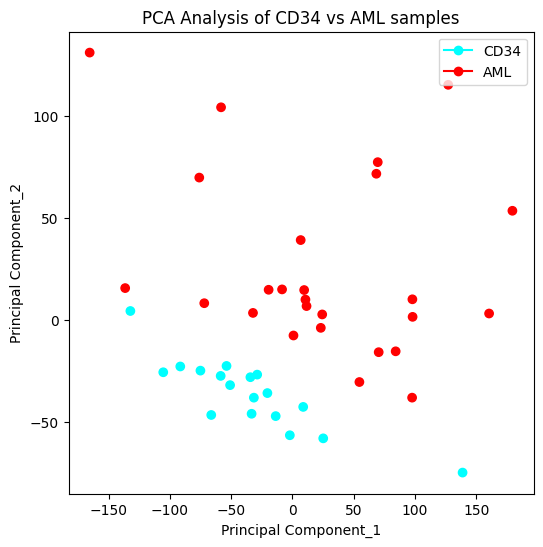

In [29]:
labels = df_t_filtered["Group"].values  # this columns is dropped in the "new_df" 
colors = ['cyan' if label == 0 else 'red' for label in labels] # cyan for healthy and red for cancerous

plt.figure(figsize=(6,6))
plt.scatter(pca_module.scores[:, 0], pca_module.scores[:, 1], c=colors)
plt.legend(handles=[plt.Line2D([], [], color='cyan', marker='o', label='CD34'),
                    plt.Line2D([], [], color='red', marker='o', label='AML')])
plt.xlabel('Principal Component_1')
plt.ylabel('Principal Component_2')
plt.title('PCA Analysis of CD34 vs AML samples')
plt.show()

What is the most contributing feature (Gene) in each PC?

In [30]:
pca_module.components # two components as expected

array([[ 0.00612141, -0.003337  ,  0.00233742, ...,  0.01223696,
         0.01221503,  0.01155329],
       [ 0.00125708, -0.00973212, -0.0001174 , ..., -0.004307  ,
        -0.00415759, -0.00391928]])

In [31]:
pca_module.components[0, :] # contribution of Genes in the first PC

array([ 0.00612141, -0.003337  ,  0.00233742, ...,  0.01223696,
        0.01221503,  0.01155329])

In [32]:
pca_module.components[1, :] # contribution of Genes in the second PC

array([ 0.00125708, -0.00973212, -0.0001174 , ..., -0.004307  ,
       -0.00415759, -0.00391928])

In [33]:
np.argmax(np.abs(pca_module.components[0, :])) # index of most influential Gene

5528

In [34]:
new_df.iloc[:, 5528]

GSM239170    2.138121
GSM239338    2.234243
GSM239339    2.176699
GSM239340    2.195292
GSM239341    2.153567
GSM239342    2.172388
GSM239343    2.329854
GSM239344    2.134819
GSM239345    2.188304
GSM239346    2.130563
GSM239348    2.157741
GSM239363    2.226555
GSM239371    2.193273
GSM239460    2.316412
GSM239485    2.241376
GSM239487    2.118793
GSM239488    2.259891
GSM239489    2.261965
GSM239490    2.109235
GSM239491    2.168708
GSM239492    2.146018
GSM239493    2.178078
GSM239494    2.206153
GSM239495    2.251264
GSM239496    2.190137
GSM239497    2.280719
GSM239498    2.321689
GSM239516    2.234692
GSM239520    2.027536
GSM239580    2.170223
GSM240405    2.060484
GSM240406    2.281990
GSM240427    2.250764
GSM240429    2.206368
GSM240500    2.199435
GSM240501    2.177337
GSM240502    2.139581
GSM240503    2.058168
GSM240504    2.154124
GSM240505    2.128879
GSM240506    2.091847
GSM240507    2.148001
GSM240508    2.190191
GSM240509    2.170938
Name: X206002_at, dtype: float64

In [35]:
print(f"Most Contribution to PC-1 comes from : {new_df.columns[5528]}")

Most Contribution to PC-1 comes from : X206002_at


In [36]:
np.argmax(np.abs(pca_module.components[1, :])) # index of most influential Gene

21577

In [37]:
new_df.iloc[:, 21577]

GSM239170     4.319050
GSM239338     4.484233
GSM239339     4.606406
GSM239340     4.613797
GSM239341     4.622573
GSM239342     4.165318
GSM239343     4.560525
GSM239344     4.557432
GSM239345     6.577142
GSM239346     9.536838
GSM239348     4.910248
GSM239363     9.799023
GSM239371     4.610439
GSM239460     5.925748
GSM239485     4.640353
GSM239487     9.345782
GSM239488    10.104834
GSM239489     6.429595
GSM239490     4.930613
GSM239491     6.231266
GSM239492     6.191824
GSM239493     5.979137
GSM239494     5.333319
GSM239495     4.603413
GSM239496     4.194569
GSM239497     6.758008
GSM239498     9.698191
GSM239516    10.020325
GSM239520     9.459636
GSM239580     4.601432
GSM240405     4.292545
GSM240406     4.674670
GSM240427     6.778796
GSM240429     4.331233
GSM240500     4.731586
GSM240501     4.414424
GSM240502     4.411084
GSM240503     5.563763
GSM240504     5.902577
GSM240505     4.569354
GSM240506     4.555067
GSM240507     4.520188
GSM240508     4.839136
GSM240509  

In [38]:
print(f"Most Contribution to PC-2 comes from : {new_df.columns[21577]}")

Most Contribution to PC-2 comes from : X222218_s_at


Best Regards